In [11]:
import pandas as pd
import numpy as np
df=pd.read_csv("problem3.csv")

In [12]:
df.head(3)

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5


- 역변환

In [39]:
for num in range(1,6):
    df[f'Q{num}-3']=6-df[f'Q{num}-3']

- 그룹의 영역별 응답 평균, 표준편차, 왜도, 첨도

In [44]:
for num in range(1,6):
    col_lst=['group']
    for col in range(1,5):
        col_lst.append(f'Q{num}-{col}')
    target=df[col_lst]
    targetdf=target.set_index('group').unstack().to_frame().reset_index()[['group', 0]].rename(columns={0:f'Q{num}'})
    display(targetdf.groupby('group').agg(['mean', 'std', 'skew', pd.DataFrame.kurt]))

Q1                              
        mean       std      skew      kurt
group                                     
A      2.984  1.263860 -0.065283 -1.095162
B      2.970  1.242837 -0.084167 -1.047102
C      2.996  1.243998 -0.048687 -1.037586
D      2.923  1.262008 -0.025453 -1.093624

Q2                              
        mean       std      skew      kurt
group                                     
A      2.990  1.238319 -0.069746 -1.019395
B      3.004  1.267119 -0.093300 -1.073471
C      3.049  1.257052 -0.131877 -1.048401
D      2.975  1.252974 -0.099610 -1.064374

Q3                              
        mean       std      skew      kurt
group                                     
A      2.972  1.268395 -0.065358 -1.103552
B      2.964  1.239452 -0.092818 -1.063828
C      2.985  1.248332 -0.104637 -1.000808
D      2.942  1.254675 -0.009225 -1.061711

Q4                              
        mean       std      skew      kurt
group                                     
A      3.059  1.255028 -0.151060 -1.014232
B      2.951  1.240217 -0.064673 -1.035397
C      2.992  1.283582 -0.113114 -1.106012
D      3.000  1.271069 -0.070333 -1.034485

Q5                              
        mean       std      skew      kurt
group                                     
A      3.038  1.258626 -0.116943 -1.059727
B      2.963  1.271711 -0.047605 -1.084950
C      3.023  1.260182 -0.136564 -1.059189
D      2.933  1.249028 -0.058391 -1.071532

- anova 분석

In [46]:
a=df[df['group']=='A']['Q1-1']
b=df[df['group']=='B']['Q1-1']
c=df[df['group']=='C']['Q1-1']
d=df[df['group']=='D']['Q1-1']

import scipy.stats as stats
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))
print(stats.shapiro(d))

ShapiroResult(statistic=0.8959194421768188, pvalue=4.089666539447423e-12)
ShapiroResult(statistic=0.9031107425689697, pvalue=1.2895768654319628e-11)
ShapiroResult(statistic=0.9036667346954346, pvalue=1.4126045819184974e-11)
ShapiroResult(statistic=0.8961024284362793, pvalue=4.2081052184506085e-12)


모두 기각, 정규분포를 따르지 않는다.

- a,b,c,d 집단간 응답에 차이가 없다.
- a,b,c,d 집단간 응답 평균이 모두 같다고 할 수는 없다.

In [47]:
stats.kruskal(a,b,c,d)

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

귀무가설을 기각할 수 없다. 즉 a,b,c,d 집단간 응답에는 차이가 없다.

- 요인분석 수행하고 결과를 시각화

In [49]:
df=df.drop(columns=['userid', 'group'])

In [51]:
#요인분석에 적합한 데이터인지 확인
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df)
p_value

0.01887367698405033

귀무가설을 기각한다. 요인성 평가에 적합하다고 판단

-KMO 검정

In [53]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model=calculate_kmo(df)
kmo_model

0.4901789141416504

0.6미만이므로 KMO값은 부적절한 것으로 간주

- 요인수 선택

In [56]:
import matplotlib.pyplot as plt
fa=FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)

#Eigen값 체크
ev, v=fa.get_eigenvalues()

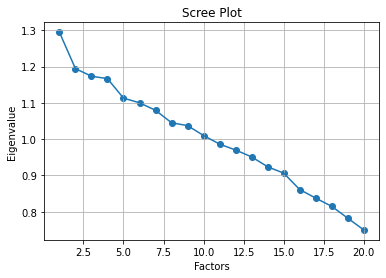

In [58]:
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#Eigenvalue가 1이되는 지점인 10개의 요인이 선택에 적합한 숫자

<AxesSubplot:>

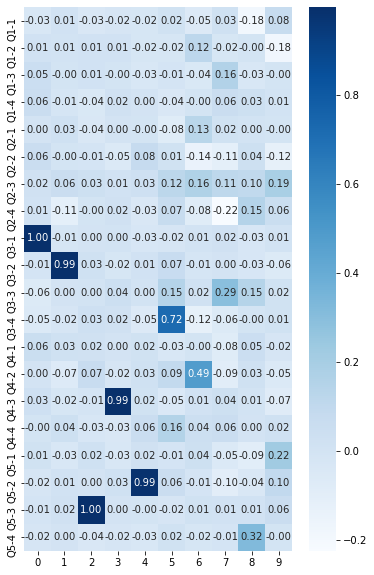

In [63]:
import seaborn as sns
fa=FactorAnalyzer(n_factors=10, rotation='varimax')
fa.fit(df)
efa_result=pd.DataFrame(fa.loadings_, index=df.columns)

plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

요인7에는 변수에 대해 높은 요인 적재량이 없다고 해석할 수 있다. 즉 위의 7가지 요소(0~6)만 활용하는 것이 좋다
-> 7개 요인으로 다시 모델링!

In [64]:
fa=FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

In [66]:
fa.get_factor_variance() #분산
df1=pd.DataFrame(fa.get_factor_variance())

#행, 열 이름 설정
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6
SS Loadings,1.008050,0.988726,0.877933,0.409423,0.356336,0.269833,0.208008
Proportion Var,0.050402,0.049436,0.043897,0.020471,0.017817,0.013492,0.010400
Cumulative Var,0.050402,0.099839,0.143735,0.164207,0.182023,0.195515,0.205915
